# DS-GA 3001.009 Modeling Time Series Data

# Week 2 Learning and Forecasting for AR Model

In [1]:
# Install statsmodels
# conda install -c conda-forge statsmodels
import statsmodels
from statsmodels.tsa.stattools import acf, ccf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics import utils
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# statsmodels.graphics.tsaplots doesn't have plotting function for CCF so I have to write my own.
def plot_ccf(x, y, ax=None, lags=None, alpha=.05, use_vlines=True, unbiased=False,
             fft=False, title='Cross-correlation', zero=True, **kwargs):
    fig, ax = utils.create_mpl_ax(ax)
    lags, nlags, irregular = statsmodels.graphics.tsaplots._prepare_data_corr_plot(x, lags, zero)
    confint = None
    ccf_val = ccf(x, y)
    if lags is not None:
        ccf_val = ccf_val[:nlags+1]
    statsmodels.graphics.tsaplots._plot_corr(ax, title, ccf_val, confint, lags, irregular, use_vlines, **kwargs)
    return fig

## Part I:  Parameter Redundancy and MA Non-uniqueness

$$x_t = 0.5 x_{t-1} - 0.5 w_{t-1} + w_t$$

$$w_t\sim N(0, \sigma^2)$$

Are $x_t$ and $w_t$ the same?

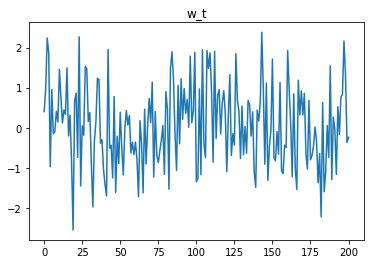

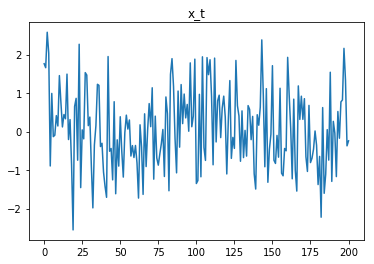

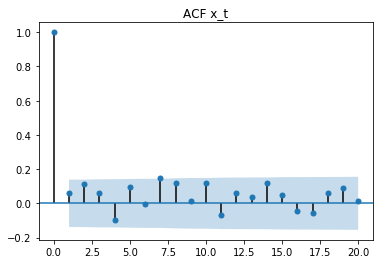

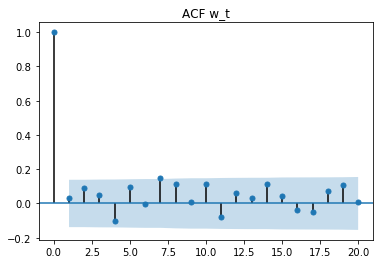

In [3]:
n = 200
mean = 0
std = 1 
lag = 20

# create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=1))
w_t = np.random.normal(mean, std, size=n+1) 
for i in range(1, n+1):
    x_t.append(0.5 * x_t[i-1] - 0.5 * w_t[i-1] + w_t[i] )

# plot x_t & w_t
plt.plot(w_t)
plt.title("w_t")
plt.show()
plt.plot(x_t)
plt.title("x_t")
plt.show()

# acf & pacf
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_acf(x=w_t, lags=lag, title="ACF w_t")
plt.show()

$$x_t = w_t + \frac{1}{5} w_{t-1}, w_t \sim N(0, 25)$$

$$y_t = v_t + 5 v_{t-1}, v_t \sim N(0,1)$$

Are $x_t$ and $y_t$ the same?

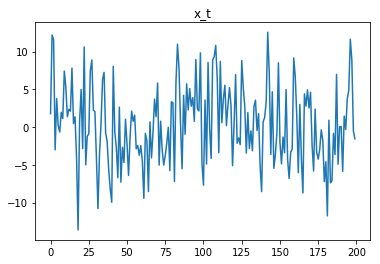

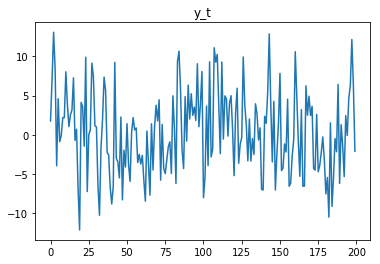

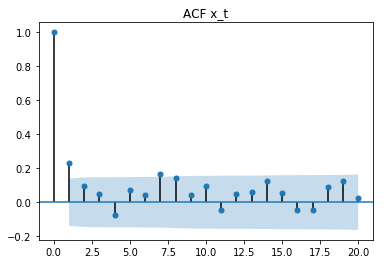

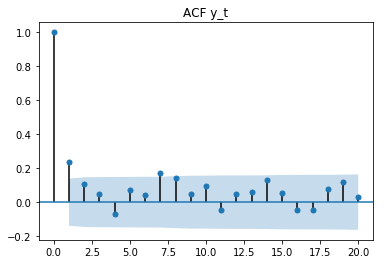

In [4]:

n = 200
mean = 0
lag = 20

# create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=1))
w_t = np.random.normal(mean, 5, size=n+1) 
np.random.seed(0)
y_t = list(np.random.normal(mean, std, size=1))
v_t = np.random.normal(mean, 1, size=n+2) 
for i in range(2, n+1):
    x_t.append(w_t[i] + 0.2 * w_t[i-1])
    y_t.append(v_t[i] + 5 * v_t[i-1])

# plot x_t & y_t
plt.plot(x_t)
plt.title("x_t")
plt.show()
plt.plot(y_t)
plt.title("y_t")
plt.show()

# acf & pacf
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_acf(x=y_t, lags=lag, title="ACF y_t")
plt.show()

## Part II: AR Modeling Example

In this example, we will fit an AR(2) and an AR(3) using the SunActivity data which denotes the number of sunspots for each year.

Wikipedia for sunspots: https://en.wikipedia.org/wiki/Sunspot

The code in this section is selected from the tutorial specified in the reference section.

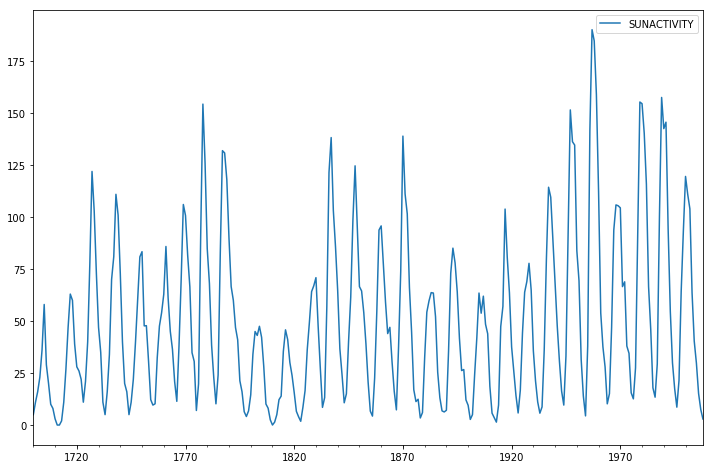

In [5]:
dta = sm.datasets.sunspots.load_pandas().data
dta
dta.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))
del dta["YEAR"]
dta.plot(figsize=(12,8))
plt.show()

### ACF & PACF

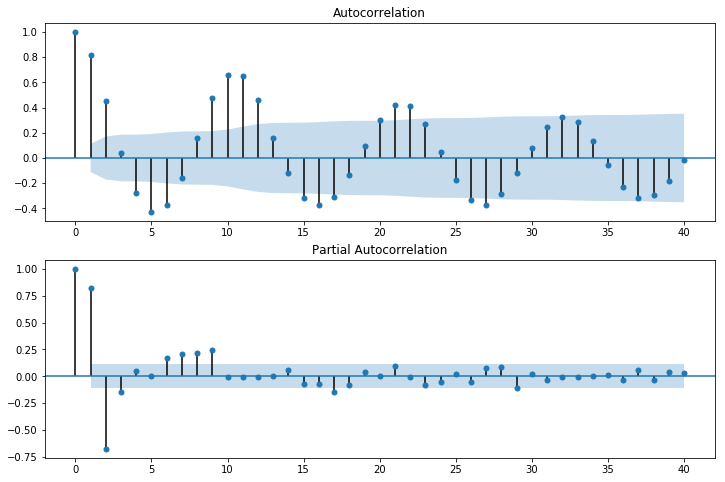

In [6]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(dta.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
plt.show()

### Fit AR Model

In [7]:
arma_mod20 = sm.tsa.ARMA(dta, (2,0)).fit(disp=False)
print(arma_mod20.params)
arma_mod30 = sm.tsa.ARMA(dta, (3,0)).fit(disp=False)
print(arma_mod30.params)

const                49.659343
ar.L1.SUNACTIVITY     1.390656
ar.L2.SUNACTIVITY    -0.688571
dtype: float64
const                49.749936
ar.L1.SUNACTIVITY     1.300810
ar.L2.SUNACTIVITY    -0.508093
ar.L3.SUNACTIVITY    -0.129650
dtype: float64


### Prediction

In [8]:
predict_sunspots = arma_mod30.predict('1990', '2012', dynamic=True)
print(predict_sunspots)

1990-12-31    167.047417
1991-12-31    140.993002
1992-12-31     94.859112
1993-12-31     46.860896
1994-12-31     11.242577
1995-12-31     -4.721303
1996-12-31     -1.166920
1997-12-31     16.185687
1998-12-31     39.021884
1999-12-31     59.449878
2000-12-31     72.170152
2001-12-31     75.376793
2002-12-31     70.436464
2003-12-31     60.731586
2004-12-31     50.201791
2005-12-31     42.076018
2006-12-31     38.114277
2007-12-31     38.454635
2008-12-31     41.963810
2009-12-31     46.869285
2010-12-31     51.423261
2011-12-31     54.399720
2012-12-31     55.321692
Freq: A-DEC, dtype: float64


/Users/Melancardie/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  from ipykernel import kernelapp as app


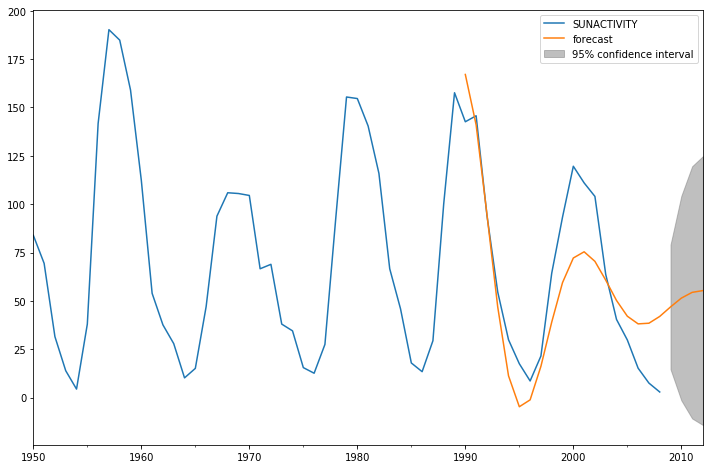

In [9]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dta.ix['1950':].plot(ax=ax)
fig = arma_mod30.plot_predict('1990', '2012', dynamic=True, ax=ax, plot_insample=False)
plt.show()

## Part III: Parameter Estimation


statsmodels.tsa.arima_model.ARMA.predict() method fits ARMA(p,q) model using exact maximum likelihood via Kalman filter. 

We will implement two methods to estimate the parameters:

- Durbin-Levinson Algorithm

- Close-form for Yule-Walker Equations

We will test our implementation on AR(p) models against the estimated parameters from statsmodels API.

### Create an AR(2) process 

$$ x_t = 0.6 x_{t-1} - 0.75 x_{t-2} + w_t $$

- ACF tails off while PACF cuts off

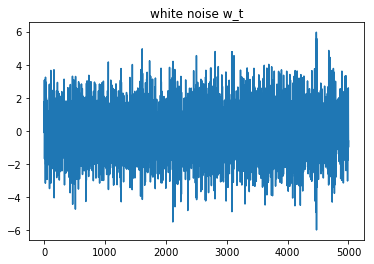

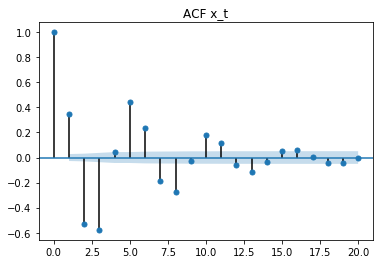

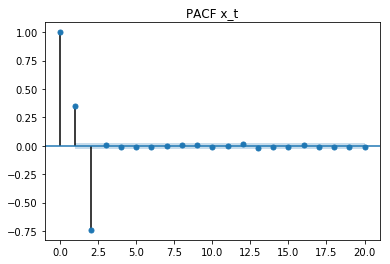

In [17]:
n = 5000
mean = 0
std = 1 
lag = 20


# create white noise
np.random.seed(0)
x_t = list(np.random.normal(mean, std, size=2))
w_t = np.random.normal(mean, std, size=n)
for i in range(2, n+2):
    x_t.append(0.6 * x_t[i-1] - 0.75 * x_t[i-2] + w_t[i-2])
# plot white noise
plt.plot(x_t)
plt.title("white noise w_t")
plt.show()

# calculate acf
acf_val = acf(x=x_t, nlags=lag)
plot_acf(x=x_t, lags=lag, title="ACF x_t")
plot_pacf(x=x_t, lags=lag, title="PACF x_t")
plt.show()


In [19]:
# use statsmodel to fit this series
arma_mod20 = sm.tsa.ARMA(x_t, (2,0)).fit(disp=False)
print(arma_mod20.params)

[-0.01315807  0.60583961 -0.74131016]


In [20]:
def durbin_levinson_ar(x, p):
    """
    Implementation for Durbin-Levinson Algorithm
    @param x: the dataset, a numpy 1D array
    @param p: lags, p in AR(p)
    @return: a 2D numpy matrix phi with shape p * p. phi[i,j]=parameter for x_{t-j} in a AR(i) model.
    """
    rho = acf(x, nlags=n)[1:]
    phi_mat = np.zeros([p,p])
    phi_mat[0,0] = rho[0]
    for i in range(1, p):
        # first calculate phi_[i,i]
        sum_numerator = 0.0
        sum_denom = 0.0
        for j in range(i):
            sum_numerator += phi_mat[i-1, j] * rho[i-j-1]
            sum_denom += phi_mat[i-1, j] * rho[j]
        phi_mat[i,i] = (rho[i] - sum_numerator) / (1 - sum_denom)
        # second calculate phi_[:i, :i]
        for j in range(i):
            phi_mat[i,j] = phi_mat[i-1,j] - phi_mat[i,i] * phi_mat[i-1,i-j-1]
    return phi_mat

Your implementation of durbin_levinson_ar(x_t, 2)[1] should roughtly match arma_mod20.params[1:].

In [21]:
print(durbin_levinson_ar(x_t, 2)[1])
print(arma_mod20.params[1:])

[ 0.60576844 -0.74132482]
[ 0.60583961 -0.74131016]


In [22]:
def inverse_yule_walker_ar(x, p):
    """
    Implementation for a direct inverse solution on Yule-Walker equations
    @param x: the dataset, a numpy 1D array
    @param p: lags, p in AR(p)
    @return: a 1-D numpy array phi of shape p. phi[i] = parameter for x_{t-i} in a AR(p) model
    """
    # compute acf
    rho = acf(x, nlags=p)
    # compute the p * p R_p matrix
    R_p = np.zeros([p,p])
    for j in range(p):
        for k in range(p):
            R_p[j,k] = rho[np.abs(j-k)]
    # compute phi = R_p^{-1} rho
    phi = np.linalg.inv(R_p).dot(rho[1:])
    return phi


Your implementation of inverse_yule_walker_ar(x_t, 2) should roughtly match arma_mod20.params[1:].

In [23]:
print(inverse_yule_walker_ar(x_t, 2))
print(arma_mod20.params[1:])

[ 0.60576844 -0.74132482]
[ 0.60583961 -0.74131016]


## Part IV: Forecasting

Implement your own prediction function for AR(p) model. To make it easier, we only consider one-step-forward in-sample prediction.

Your implementation will be tested against statsmodels.tsa.arima_model.ARMA.predict.

In [24]:
def in_sample_predict(phi, x, start, end, dynamic=False):
    """
    Function that perform IN-SAMPLE one-step-forward prediction.
    x_t = phi_{p,1} * x_{t-1} +  phi_{p,2} * x_{t-2} + ... + phi_{p,p} * x_{t-p} + mu
    return [x_start, x_{start+1}, ..., x_{end-1}, x_{end}]
    @param phi: an np array with p elements [mu, phi_{p,1},phi_{p,2}, ..., phi_{p,p}]
    @param x: input data
    @param start: an integer, zero-indexed
    @param end: an integer, zero-indexed
    @param dynamic: a boolean flag, when predicting x_{t+2} whether to use 
                    x_{t+1} in the original data or the x_{t+1} that the function produces
    @return: a np array with end-start elements
    """
    output = []
    mu = phi[0]
    phi = phi[1:]
    if dynamic:
        current_subset = list(np.flip(x[start-len(phi):start],0))
        for i in range(start, end+1):
            next_pred = np.sum(phi * np.array(current_subset)) + mu
            output.append(next_pred)
            current_subset = [next_pred] + current_subset[:len(current_subset)-1] 
    else:
        for i in range(start, end+1):
            output.append(np.sum(phi * np.flip(x[i-len(phi):i],0)) + mu)
    return np.array(output)

### Test against statsmodels implementation

Note that statsmodels uses a slightly different implementation so the two series should roughly match. If you turn on dynamic=True, the difference becomes larger as time goes.

In [25]:
predict_sunspots = arma_mod20.predict(start=2, end=9, dynamic=True)
predict_sunspots

array([-1.08021945, -0.96602093,  0.20058331,  0.82270185,  0.33479032,
       -0.4219886 , -0.51878148, -0.01641453])

In [26]:
in_sample_predict(arma_mod20.params, x_t, 2, 9, dynamic=True)

array([-1.07843691, -0.96315847,  0.20277862,  0.82369242,  0.33554557,
       -0.42048283, -0.51664657, -0.01445483])

### Please turn in the code before 02/08/2018 6:45 pm. Please name your notebook netid.ipynb.

### Your work will be evaluated based on the code and plots. You don't need to write down your answers to these questions in the text blocks. 

### Reference

Autoregressive Moving Average (ARMA): Sunspots data, http://www.statsmodels.org/dev/examples/notebooks/generated/tsa_arma_0.html